# Universidad Autónoma del Estado de México

# Centro Universitario UAEM Zumpango

## Ingenieria en computación

## Graficación Computacional

**Alumno:** Diego Gómez Tagle González

**Profesor:** Hazem Alvarez

**Fecha:** 07 de octubre de 2024

**Descripción:** envolvente convexo

Este código utiliza Python para generar y graficar la envolvente convexa (convex hull) de dos conjuntos de puntos utilizando las bibliotecas NumPy y Matplotlib. A continuación se detalla su funcionamiento:


1. Función turn_right
Esta función se encarga de construir la parte superior o inferior de la envolvente convexa. Toma los puntos ordenados y elimina los que no forman parte de la envolvente.

      Entrada: Una lista de coordenadas de puntos en 2D.
      Salida: Un subconjunto de puntos que forman una parte de la envolvente convexa.
      Proceso: Se utiliza la regla de "giro a la derecha" para determinar si se deben eliminar puntos al verificar el determinante del área formada por tres puntos consecutivos.

2. Función area2D
Esta función calcula el área determinada por tres puntos en 2D, permitiendo determinar si los puntos forman un giro a la derecha o a la izquierda.

  Entrada: Tres puntos (p1, p2, p3) en el plano.
  Salida: Un valor que indica si los puntos forman un giro a la derecha (valor negativo), a la izquierda (valor positivo) o son colineales (valor 0).

3. Función convex_hull
Esta función construye la envolvente convexa completa para un conjunto de puntos.

  Entrada: Una lista de coordenadas de puntos.
  Salida: La lista de puntos que forman la envolvente convexa.
  Proceso: Los puntos se ordenan, y se construyen tanto la parte superior como la inferior de la envolvente convexa utilizando turn_right.

4. Función graph
Esta función se encarga de graficar los puntos y la envolvente convexa.

  Entrada: La envolvente convexa, el conjunto de puntos, el color para la gráfica y el título de la figura.
  Proceso: Se calculan los límites de los ejes y se grafica tanto el conjunto de puntos como la envolvente convexa en el color especificado.

5. Puntos Fijos
Se definen dos conjuntos de puntos fijos para generar dos figuras distintas:

  coord_points1: Un conjunto de puntos sencillo.
  coord_points2: Puntos que forman una estrella.


6. Generación de las Gráficas
El código genera dos figuras:

  Figura 1: Muestra la envolvente convexa para coord_points1.
  Figura 2: Muestra la envolvente convexa para coord_points2.
  Ambas figuras se muestran al final con plt.show().

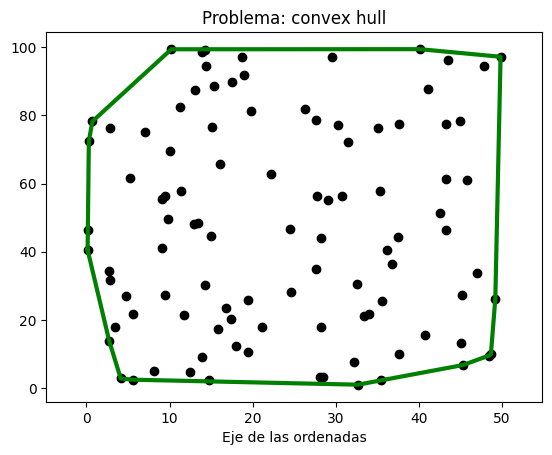

In [ ]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt


#Funciones

def turn_right():
    array = [coord_points[0], coord_points[1]]
    for i in range (2, len(coord_points)):
        array.append(coord_points[i])
        while len(array) > 2 and np.linalg.det([array[-3], array[-2], array[-1]]) > 0:
            array.pop(-2)
    return array

def convex_hull():
    coord_points.sort()
    l_upper = turn_right()
    coord_points.reverse()
    l_lower = turn_right()
    l = l_upper + l_lower
    return l

def graph(convex_pol, coord_points):
    #Acomodando listas adecuadas

    x_points = [i[0] for i in coord_points]
    y_points = [i[1] for i in coord_points]

    x_polygon = [i[0] for i in convex_pol]
    y_polygon = [i[1] for i in convex_pol]

    #definiendo limites de la grafica
    x_lim_der = max(x_points)+5
    y_lim_sup = max(y_points)+5
    x_lim_izq = min(x_points)-5
    y_lim_inf = min(y_points)-5

    # Asignacion de los liites extremos
    plt.xlim(x_lim_izq,x_lim_der)
    plt.ylim(y_lim_inf, y_lim_sup)

    #Graficacion
    plt.title('Problema: convex hull')
    plt.xlabel('Eje de las abscisas')
    plt.xlabel('Eje de las ordenadas')
    plt.plot(x_points, y_points, 'ko')
    plt.plot(x_polygon, y_polygon, 'g-', linewidth = 3.0)

#Generacion de coordenadas de forma aleatorea
num_points = 100
coord_points = []
for i in range(num_points): coord_points.append([rand.uniform(0,50), rand.uniform(0,100), 1.0])

# creacion y graficacion
convex_pol = convex_hull()
graph(convex_pol,  coord_points)



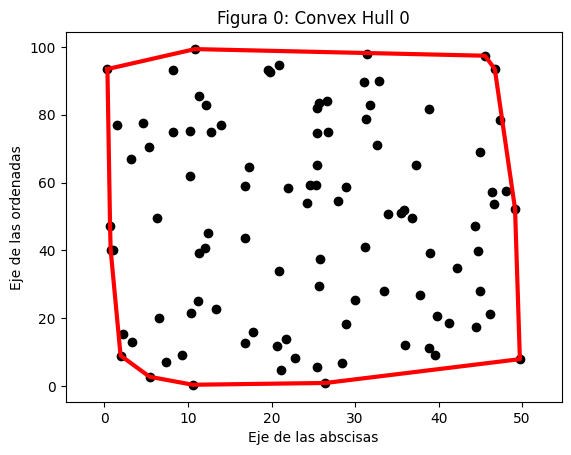

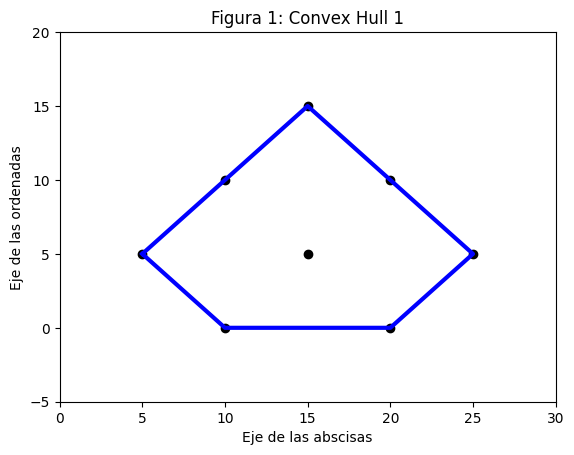

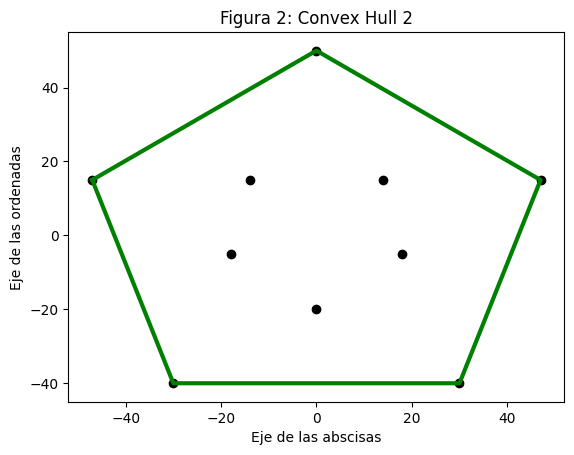

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

# Funciones
def turn_right(coord_points):
    array = [coord_points[0], coord_points[1]]
    for i in range(2, len(coord_points)):
        array.append(coord_points[i])
        while len(array) > 2 and area2D(array[-3], array[-2], array[-1]) > 0:
            array.pop(-2)
    return array

# Función para calcular el área determinada por tres puntos
def area2D(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def convex_hull(coord_points):
    coord_points.sort()
    l_upper = turn_right(coord_points)
    coord_points.reverse()
    l_lower = turn_right(coord_points)
    l = l_upper + l_lower
    return l

def graph(convex_pol, coord_points, color, title):
    # Acomodando listas adecuadas
    x_points = [i[0] for i in coord_points]
    y_points = [i[1] for i in coord_points]

    x_polygon = [i[0] for i in convex_pol]
    y_polygon = [i[1] for i in convex_pol]

    # Definiendo limites de la grafica
    x_lim_der = max(x_points) + 5
    y_lim_sup = max(y_points) + 5
    x_lim_izq = min(x_points) - 5
    y_lim_inf = min(y_points) - 5

    # Asignacion de los limites extremos
    plt.xlim(x_lim_izq, x_lim_der)
    plt.ylim(y_lim_inf, y_lim_sup)

    # Graficacion
    plt.title(title)
    plt.xlabel('Eje de las abscisas')
    plt.ylabel('Eje de las ordenadas')
    plt.plot(x_points, y_points, 'ko')
    plt.plot(x_polygon, y_polygon, color, linewidth=3.0)

    #Generacion de coordenadas de forma aleatorea
num_points = 100
coord_points = []
for i in range(num_points): coord_points.append([rand.uniform(0,50), rand.uniform(0,100), 1.0])

# creacion y graficacion
convex_pol = convex_hull(coord_points)
plt.figure(1)
graph(convex_pol,  coord_points, 'red', "Figura 0: Convex Hull 0")

# Puntos fijos para dos figuras
coord_points1 = [[5, 5], [10, 10], [15, 5], [20, 10], [25, 5], [10, 0], [20, 0], [15, 15]]
coord_points2 = [[0, 50], [14, 15], [47, 15], [18, -5], [30, -40], [0, -20], [-30, -40], [-18, -5], [-47, 15], [-14, 15]]


# Creacion y graficacion para el primer conjunto de puntos
convex_pol1 = convex_hull(coord_points1)
plt.figure(2)
graph(convex_pol1, coord_points1, 'blue', 'Figura 1: Convex Hull 1')

# Creacion y graficacion para el segundo conjunto de puntos
convex_pol2 = convex_hull(coord_points2)
plt.figure(3)
graph(convex_pol2, coord_points2, 'green', 'Figura 2: Convex Hull 2')

# Mostrar ambas figuras
plt.show()